<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/Project%203/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
### This cell is installing keras using pip install

# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
### Here we are importing all the libraries needed for our modelling task

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets

In [3]:
### In this cell, we are loading MNIST hand written digits data to train and test numpy arrays

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


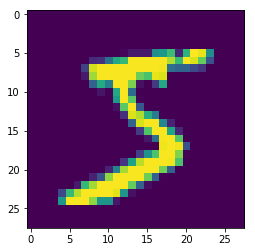

In [4]:
# This cell displays the first value in training data

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [5]:
# This cell calculates the maximum receptive field required for this use case

min_row,min_col = 0,0
max_row,max_col = 27,27

min_row_list,max_row_list,min_col_list,max_col_list=[],[],[],[]

for k in range(X_train.shape[0]):
  for i in range(X_train.shape[1]//2):
    min_row = i if sum(X_train[k][i,:])==0 and i>min_row else min_row
    max_row = 27-i if sum(X_train[k][27-i,:])==0 and (27-i)<max_row else max_row

  for i in range(X_train.shape[2]//2):
    min_col = i if sum(X_train[k][:,i])==0 and i>min_col else min_col
    max_col = 27-i if sum(X_train[k][:,27-i])==0 and (27-i)<max_col else max_col
  
  min_row_list.append(min_row)
  max_row_list.append(max_row)
  min_col_list.append(min_col)
  max_col_list.append(max_col)

#print("min_row:",min_row,", max_row:",max_row,", min_col:",min_col,", max_col:",max_col)
min_dim = min(min_row_list+min_col_list)
max_dim = max(max_row_list+max_col_list)
print("min_dim:",min_dim,", max_dim:",max_dim,", receptive field required:",max_dim-min_dim+1)

min_dim: 3 , max_dim: 25 , receptive field required: 23


In [0]:
# Here we are reshapping the train and test images to be compatible with the model to be defined

# The images are formatted to dimension Length*Width*Channel
# Since MNIST is a collection of grey scale images, the channel will be 1. So dimension is 28*28*1

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Here we are changing the numpy value to float and normalizing them by dividing each value by 255
# The pixel values are scaled between 0 and 1 which is benefecial for our network while backpropagating.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# This cell display first 10 labels in our training data

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# This cell encodes one columns into 10 columns which basically has a flag corresponding to each class
# Here 6th column is the flag for label 5 

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
# Reformatted label data

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Model Definition

In [11]:
# This cell defines our model

# Defining model using Keras sequential API
from keras.layers import Activation
model = Sequential()

# LRF = Local Receptive Field, GRF = Global Receptive Field

# Layer 1 : Type=Convolution + BatchNorm, Input=28*28*1, Kernel Size=3*3*1, No. of Kernels=8, Activation=RELU, LRF=3*3, GRF=3*3, Output=26*26*8
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28,28,1),use_bias=False,name='conv_1'))
model.add(BatchNormalization(name='batch_1'))

# Layer 2 : Type=Convolution + BatchNorm, Input=26*26*8, Kernel Size=3*3*8, No. of Kernels=16, Activation=RELU, LRF=3*3, GRF=5*5, Output=24*24*16
model.add(Conv2D(16, (3, 3), activation='relu',use_bias=False,name='conv_2'))
model.add(BatchNormalization(name='batch_2'))

# Layer 3 : Type=Convolution + BatchNorm, Input=24*24*16, Kernel Size=3*3*16, No. of Kernels=16, Activation=RELU, LRF=3*3, GRF=7*7, Output=22*22*16
model.add(Conv2D(16, (3, 3), activation='relu',use_bias=False,name='conv_3'))
model.add(BatchNormalization(name='batch_3'))

# Layer 4 : Type=Max Pooling, Input=22*22*16, Kernel Size=2*2, LRF=2*2, GRF=8*8, Output=11*11*16
model.add(MaxPooling2D((2, 2),name='pool_1'))

# Layer 5 : Type=Convolution + BatchNorm, Input=11*11*16, Kernel Size=3*3*16, No. of Kernels=16, Activation=RELU, LRF=3*3, GRF=12*12, Output=9*9*16
model.add(Conv2D(16, (3, 3), activation='relu',use_bias=False,name='conv_4'))
model.add(BatchNormalization(name='batch_4'))

# Layer 6 : Type=Convolution + BatchNorm, Input=9*9*16, Kernel Size=3*3*16, No. of Kernels=16, Activation=RELU, LRF=3*3, GRF=16*16, Output=7*7*16
model.add(Conv2D(16, (3, 3), activation='relu',use_bias=False,name='conv_5'))
model.add(BatchNormalization(name='batch_5'))

# Layer 7 : Type=Convolution + BatchNorm, Input=7*7*16, Kernel Size=3*3*16, No. of Kernels=32, Activation=RELU, LRF=3*3, GRF=20*20, Output=5*5*32
model.add(Conv2D(32, (3, 3), activation='relu',use_bias=False,name='conv_6'))
model.add(BatchNormalization(name='batch_6'))

# Layer 8 : Type=Convolution + BatchNorm, Input=5*5*32, Kernel Size=3*3*32, No. of Kernels=16, Activation=RELU, LRF=3*3, GRF=24*24, Output=3*3*16
model.add(Conv2D(16, (3, 3), activation='relu',use_bias=False,name='conv_7'))
model.add(BatchNormalization(name='batch_7'))

# Layer 9 : Type=Convolution + BatchNorm, Input=3*3*16, Kernel Size=3*3*16, No. of Kernels=10, Activation=RELU, LRF=3*3, GRF=28*28, Output=1*1*10
model.add(Conv2D(10, (3, 3),use_bias=False,name='conv_8'))
model.add(BatchNormalization(name='batch_8'))

# Layer 10 : Type=Flatten, Input=1*1*10, Output=10 [1*1*10 to list of length 10]
model.add(Flatten(name='flatten'))

# Output : Softmax Function
model.add(Activation('softmax',name='activation'))

# Display model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 8)         72        
_________________________________________________________________
batch_1 (BatchNormalization) (None, 26, 26, 8)         32        
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_2 (BatchNormalization) (None, 24, 24, 16)        64        
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 16)        2304      
_________________________________________________________________
batch_3 (BatchNormalization) (None, 22, 22, 16)        64        
_________________________________________________________________
pool

# Model Training

In [0]:
# Compiling the model

# Loss function used is categorical cross entropy
# Optimizer used is adam
# Evaluation metric used is accuracy

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [0]:
# Training process
# Fitting the model on training data

# Batch Size: No of input images seen by the model at a given instance
# epochs : Number of iterations over the training data
# Verbose : The output display formatting of training process

model.fit(X_train, Y_train, batch_size=32, epochs=100,validation_data=(X_test, Y_test),callbacks=[checkpointer], verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 35s 588us/step - loss: 0.3629 - acc: 0.9350 - val_loss: 0.1142 - val_acc: 0.9824

Epoch 00001: val_acc improved from -inf to 0.98240, saving model to best_weights.hdf5
Epoch 2/100
60000/60000 [==============================] - 33s 557us/step - loss: 0.1281 - acc: 0.9744 - val_loss: 0.0508 - val_acc: 0.9887

Epoch 00002: val_acc improved from 0.98240 to 0.98870, saving model to best_weights.hdf5
Epoch 3/100
60000/60000 [==============================] - 34s 559us/step - loss: 0.0832 - acc: 0.9818 - val_loss: 0.0387 - val_acc: 0.9898

Epoch 00003: val_acc improved from 0.98870 to 0.98980, saving model to best_weights.hdf5
Epoch 4/100
60000/60000 [==============================] - 34s 559us/step - loss: 0.0622 - acc: 0.9849 - val_loss: 0.0342 - val_acc: 0.9910

Epoch 00004: val_acc improved from 0.98980 to 0.99100, saving model to best_weights.hdf5
Epoch 5/100
60000/60000 [========

In [0]:
model.load_weights('best_weights.hdf5')
score = model.evaluate(X_test, Y_test,verbose=0)

In [0]:
print(score)

[0.0176707603193121, 0.9953]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.98996222e-05 1.09609835e-04 6.77368662e-05 3.04442161e-04
  1.24303639e-04 1.18752778e-05 1.62519027e-05 9.99264300e-01
  1.61540302e-05 6.54326795e-05]
 [5.16532145e-06 2.75943023e-07 9.99962568e-01 8.16431168e-07
  2.15241034e-05 1.14597114e-07 4.40322219e-06 3.45292960e-06
  1.87677301e-07 1.50156529e-06]
 [2.19840103e-07 9.99987364e-01 1.50681316e-07 1.56336387e-06
  2.23548909e-06 1.67470648e-06 4.01838497e-06 1.47401147e-06
  1.07876258e-06 1.82949719e-07]
 [9.99843240e-01 1.29839063e-05 4.53644861e-06 9.26059693e-06
  4.86419140e-07 7.72320800e-06 1.03876700e-05 3.86425836e-06
  1.06866028e-04 6.40723897e-07]
 [1.32060295e-05 3.62038168e-06 7.40635301e-07 3.56913392e-06
  9.99861240e-01 8.42260943e-06 7.01831914e-06 2.20301135e-05
  1.60860054e-05 6.40543003e-05]
 [1.23788681e-07 9.99992251e-01 6.42369287e-07 2.62219146e-07
  7.73834302e-07 3.02444562e-07 1.60688137e-06 2.62978324e-06
  7.95223514e-07 4.60508318e-07]
 [2.61713460e-04 5.29471145e-04 6.16659308e-05 5.78058898e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv_8'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()